Lasso Model (L1 Regularization):
Mean Squared Error: 0.6796290284328825
R-squared: 0.48136113250290735

Ridge Model (L2 Regularization):
Mean Squared Error: 0.5558879138674179
R-squared: 0.5757905180002315

Linear Regression using original features:
Mean Squared Error: 0.5558915986952444
R-squared: 0.5757877060324508

Linear Regression using PCA-transformed features:
Mean Squared Error: 0.7431025684653448
R-squared: 0.432923170701341

Linear Regression using selected features:
Mean Squared Error: 0.5489096741573384
R-squared: 0.5811157560182487


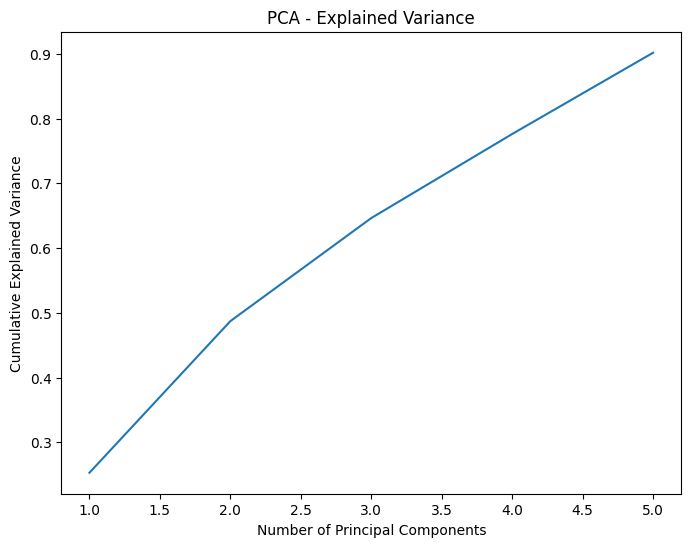

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load California Housing Dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Apply Lasso (L1 Regularization) and Ridge (L2 Regularization)
lasso = Lasso(alpha=0.1)  # L1 regularization
ridge = Ridge(alpha=0.1)  # L2 regularization

# Fit Lasso and Ridge models
lasso.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)

# Predictions
lasso_pred = lasso.predict(X_test_scaled)
ridge_pred = ridge.predict(X_test_scaled)

# Evaluation
print("Lasso Model (L1 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, lasso_pred))
print("R-squared:", r2_score(y_test, lasso_pred))

print("\nRidge Model (L2 Regularization):")
print("Mean Squared Error:", mean_squared_error(y_test, ridge_pred))
print("R-squared:", r2_score(y_test, ridge_pred))

# Step 4: Apply PCA (Principal Component Analysis)
pca = PCA(n_components=5)  # Reduce to 5 principal components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Step 5: Feature Selection (using SelectKBest)
selector = SelectKBest(f_classif, k=5)  # Select top 5 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

# Step 6: Train a linear regression model using the selected features
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# Using original data
regressor.fit(X_train_scaled, y_train)
y_pred_original = regressor.predict(X_test_scaled)
print("\nLinear Regression using original features:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_original))
print("R-squared:", r2_score(y_test, y_pred_original))

# Using PCA-transformed data
regressor.fit(X_train_pca, y_train)
y_pred_pca = regressor.predict(X_test_pca)
print("\nLinear Regression using PCA-transformed features:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_pca))
print("R-squared:", r2_score(y_test, y_pred_pca))

# Using selected features
regressor.fit(X_train_selected, y_train)
y_pred_selected = regressor.predict(X_test_selected)
print("\nLinear Regression using selected features:")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_selected))
print("R-squared:", r2_score(y_test, y_pred_selected))

# Optional: Visualize the explained variance ratio from PCA
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.show()
